In [1]:
# Import necessary libraries

from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the pre-trained model, feature extractor, and tokenizer
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

In [3]:
# Use GPU if available, otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, 

In [5]:
# Define a function to predict captions for a list of images
def predict_step(image_paths):
  """
    Generate image captions for a list of images.

    Args:
        image_paths (list): List of file paths to the images.

    Returns:
        list: List of generated image captions.
    """
    
  images = []
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  # Extract features and convert to tensor
  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  # Generate image captions
  output_ids = model.generate(pixel_values)

  # Decode the generated captions
  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

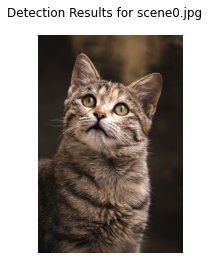

Description: a cat that is looking at the camera



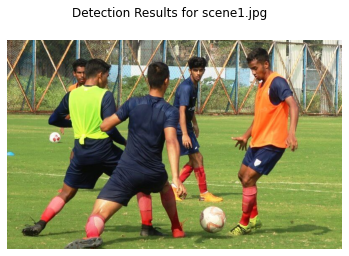

Description: young men playing a game of soccer



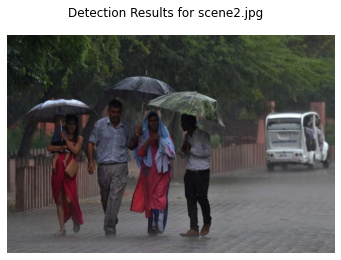

Description: people walking down a street with umbrellas



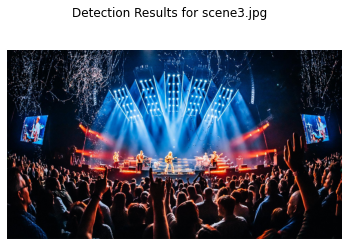

Description: a crowd of people standing around a stage with lights on



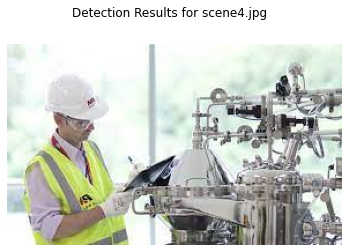

Description: a man working on a machine in a factory


In [8]:
# Directory containing images
image_dir = r"C:\Users\HP\Desktop\SHALA\Scene Detector\Test Images"

# Iterate through images in the directory
for image_filename in os.listdir(image_dir):
    if image_filename.endswith(('.jpg', '.jpeg', '.png')):  # Filter image files
        image_path = os.path.join(image_dir, image_filename)
        
        # Perform prediction
        predictions = predict_step([image_path])

        print("=" * 50,"\n")

        # Display the plot
        plt.suptitle(f"Detection Results for {os.path.basename(image_path)}", fontsize=12)
        
        # Load and display image
        image = Image.open(image_path)
        plt.imshow(image)
        plt.axis("off")
        plt.show()
        
        # Print corresponding description
        print("Description:", predictions[0])